In [1]:
import pandas as pd

In [2]:
transactions = pd.read_csv("transactions.csv")
users = pd.read_csv("users.csv")
merchants = pd.read_csv("merchants.csv")

In [3]:
print(transactions.isnull().sum())
print(users.isnull().sum())
print(merchants.isnull().sum())

txn_id         0
user_id        0
txn_type       0
txn_amount     0
txn_status     0
timestamp      0
merchant_id    0
dtype: int64
user_id        0
signup_date    0
kyc_status     0
state          0
device_type    0
dtype: int64
merchant_id      0
merchant_name    0
industry         0
dtype: int64


In [5]:
#merging datasets
merged_df = transactions.merge(users, on="user_id", how="left")

# Merge the result with merchants
unified_df = merged_df.merge(merchants, on="merchant_id", how="left")

In [6]:
print(unified_df.head())
print(unified_df.columns)
print(unified_df.info())

      txn_id user_id txn_type  txn_amount txn_status            timestamp  \
0  TXN000000  U00503      UPI     1148.58    Success  2025-03-13 14:02:22   
1  TXN000001  U00924      UPI      688.06    Success  2025-05-01 21:19:17   
2  TXN000002  U00470      UPI     1429.94   Reversed  2025-02-14 13:50:47   
3  TXN000003  U00644     Card     1645.30    Success  2025-05-01 01:38:35   
4  TXN000004  U00539      UPI      108.97    Success  2025-01-25 17:15:27   

  merchant_id signup_date kyc_status        state device_type  \
0       M0071  2025-03-23    Pending      Gujarat     Android   
1       M0028  2025-02-20   Verified  West Bengal     Android   
2       M0043  2024-11-16   Verified        Delhi     Android   
3       M0055  2024-08-21   Verified   Tamil Nadu     Android   
4       M0021  2024-06-12   Verified    Karnataka     Android   

                merchant_name     industry  
0                  Wilson Ltd  Electronics  
1                 Jenkins PLC       Retail  
2          

In [7]:
unified_df.to_csv("Downloads/unified_dataset.csv", index=False) #saving unified dataset to downlaods.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

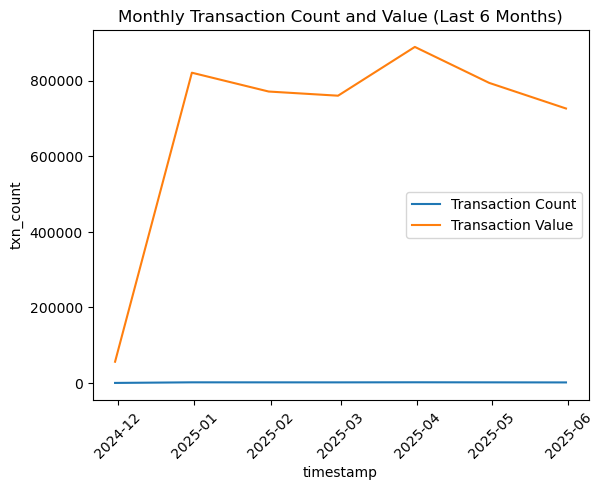

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Downloads/unified_dataset.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter for last 6 months
six_months_ago = pd.Timestamp.now() - pd.DateOffset(months=6)
last_6_months = df[df['timestamp'] >= six_months_ago]


last_6_months = last_6_months.dropna(subset=['txn_id', 'txn_amount'])


monthly_volume = last_6_months.groupby(pd.Grouper(key='timestamp', freq='M')) \
    .agg(
        txn_count=('txn_id', lambda x: x.nunique()),  # Use nunique for reliable counting
        txn_value=('txn_amount', 'sum')
    ).reset_index()

# Plot for monthly transaction count and value 
sns.lineplot(data=monthly_volume, x='timestamp', y='txn_count', label='Transaction Count')
sns.lineplot(data=monthly_volume, x='timestamp', y='txn_value', label='Transaction Value')
plt.title("Monthly Transaction Count and Value (Last 6 Months)")
plt.xticks(rotation=45)
plt.show()



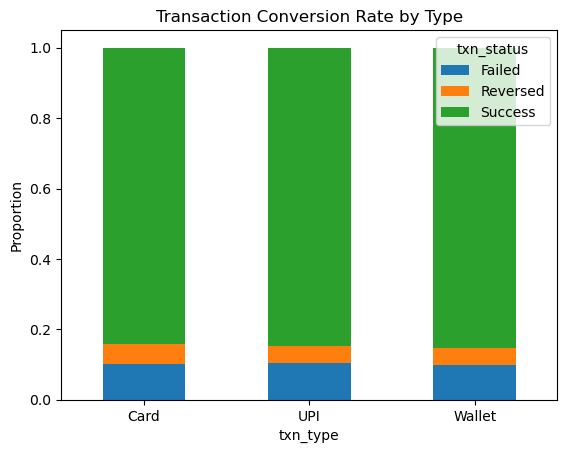

In [15]:
#plot for transaction conversion rate by type 
conversion = df.groupby('txn_type')['txn_status'].value_counts(normalize=True).unstack()
conversion.plot(kind='bar', stacked=True)
plt.title('Transaction Conversion Rate by Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

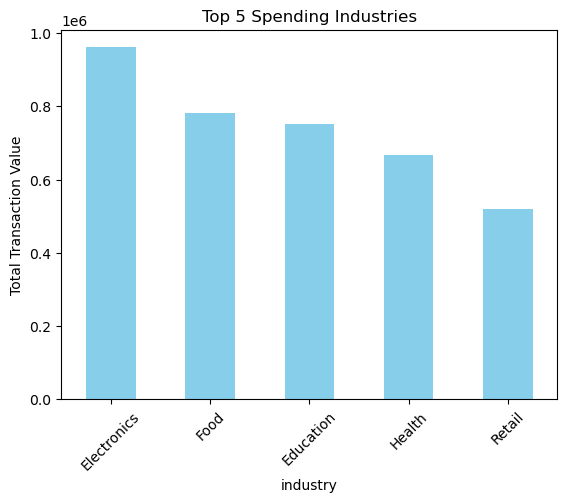

In [16]:
#plot to identify the industry that spends the most 
industry_spend = df[df['txn_status'] == 'Success'].groupby('industry')['txn_amount'].sum()
top_5_industries = industry_spend.nlargest(5)

top_5_industries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Spending Industries')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()


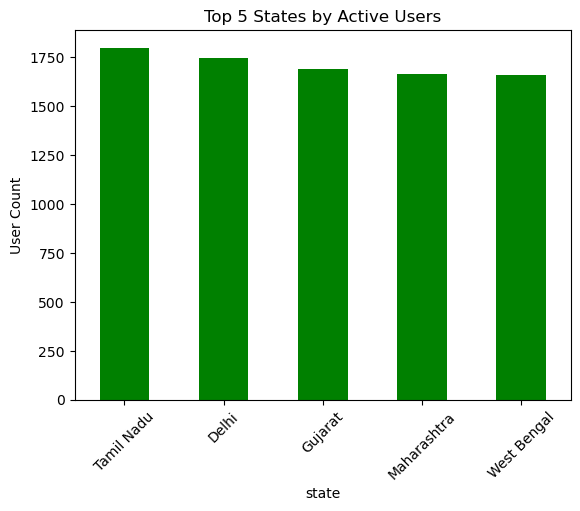

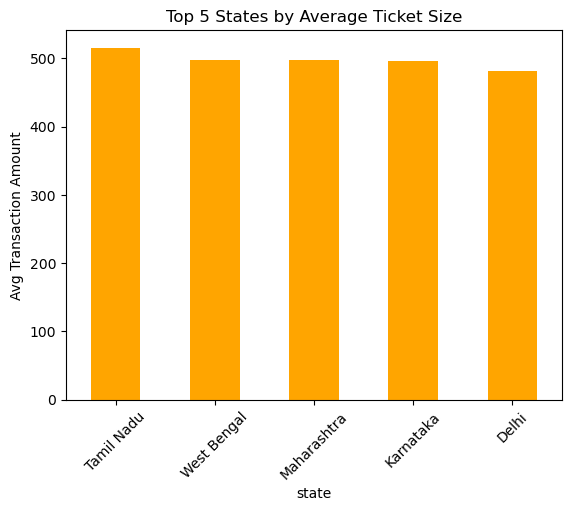

In [17]:
#plot to identify top 5 states with most active users. 

active_users_by_state = df['state'].value_counts().head(5)
avg_ticket_by_state = df[df['txn_status'] == 'Success'].groupby('state')['txn_amount'].mean().nlargest(5)

# Plot active users
active_users_by_state.plot(kind='bar', color='green')
plt.title('Top 5 States by Active Users')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

# Plot avg ticket size
avg_ticket_by_state.plot(kind='bar', color='orange')
plt.title('Top 5 States by Average Ticket Size')
plt.ylabel('Avg Transaction Amount')
plt.xticks(rotation=45)
plt.show()

In [18]:
#Transaction is flagged as suspicious if amount is more Rs.3000 and KYC is unverified
high_value_unverified = df[(df['kyc_status'] != 'Verified') & (df['txn_amount'] > 3000)]
print("Suspicious transactions (high value & unverified KYC):")
print(high_value_unverified[['user_id', 'txn_amount', 'kyc_status', 'timestamp']])

Suspicious transactions (high value & unverified KYC):
     user_id  txn_amount kyc_status           timestamp
291   U00758     3020.92    Pending 2025-05-26 05:29:13
1859  U00771     3680.89    Pending 2025-03-16 04:20:07
2116  U00892     3657.95    Pending 2025-04-14 02:09:58
4050  U00774     3631.84    Pending 2025-03-24 10:56:54
4435  U00270     3425.48    Pending 2025-02-12 15:00:30
5009  U00869     3416.56    Pending 2025-01-03 06:23:37
5388  U00091     3249.48    Pending 2025-01-10 14:05:34
8297  U00431     3039.18    Pending 2025-01-28 10:31:09
9267  U00383     3116.50    Pending 2024-12-25 15:44:34


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['user_id', 'timestamp'])

from collections import defaultdict
import datetime

user_spike_flags = []

for user_id, group in df.groupby('user_id'):
    times = group['timestamp'].tolist()
    for i in range(len(times) - 5):
        if (times[i + 5] - times[i]) <= pd.Timedelta(minutes=10):
            user_spike_flags.append(user_id)
            break

suspicious_users = df[df['user_id'].isin(user_spike_flags)]
print("Users with transaction spikes:")
print(suspicious_users[['user_id', 'timestamp']].drop_duplicates())


Users with transaction spikes:
Empty DataFrame
Columns: [user_id, timestamp]
Index: []


In [20]:
failed_txns = df[df['txn_status'] == 'Failed']
failed_txns = failed_txns.sort_values(['user_id', 'timestamp'])

flagged_users = []

for user_id, group in failed_txns.groupby('user_id'):
    group_times = group['timestamp'].tolist()
    for i in range(len(group_times) - 2):
        if (group_times[i+2] - group_times[i]) <= pd.Timedelta(minutes=5):
            flagged_users.append(user_id)
            break

suspicious_failed = df[df['user_id'].isin(flagged_users) & (df['txn_status'] == 'Failed')]
print("Users with repeated failed transactions:")
print(suspicious_failed[['user_id', 'timestamp']])

Users with repeated failed transactions:
Empty DataFrame
Columns: [user_id, timestamp]
Index: []


In [27]:
high_value_unverified = df[(df['kyc_status'] != 'Verified') & (df['txn_amount'] > 3000)].copy()
high_value_unverified['fraud_flag'] = 'High-Value Unverified KYC'

# printing results
print("High-Value Transactions by Unverified KYC:")
print(high_value_unverified[['txn_id', 'user_id', 'txn_amount', 'kyc_status', 'timestamp']])



High-Value Transactions by Unverified KYC:
         txn_id user_id  txn_amount kyc_status           timestamp
5388  TXN005388  U00091     3249.48    Pending 2025-01-10 14:05:34
4435  TXN004435  U00270     3425.48    Pending 2025-02-12 15:00:30
9267  TXN009267  U00383     3116.50    Pending 2024-12-25 15:44:34
8297  TXN008297  U00431     3039.18    Pending 2025-01-28 10:31:09
291   TXN000291  U00758     3020.92    Pending 2025-05-26 05:29:13
1859  TXN001859  U00771     3680.89    Pending 2025-03-16 04:20:07
4050  TXN004050  U00774     3631.84    Pending 2025-03-24 10:56:54
5009  TXN005009  U00869     3416.56    Pending 2025-01-03 06:23:37
2116  TXN002116  U00892     3657.95    Pending 2025-04-14 02:09:58


In [26]:
failed_counts = df[df['txn_status'] == 'Failed']['user_id'].value_counts()
print(failed_counts[failed_counts >= 3])


user_id
U00229    5
U00304    4
U00105    4
U00032    4
U00807    4
         ..
U00512    3
U00840    3
U00815    3
U00228    3
U00617    3
Name: count, Length: 78, dtype: int64
